<a href="https://colab.research.google.com/github/anushbareyan/pedagogical-machine-simulation/blob/main/pedagogical-machine-simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import matplotlib.pyplot as plt
import math
import numpy as np

# Gravitational acceleration constant
g = 9.8

def accelerations(M1, M2, M3, mu1=0, mu2=0, mu3=0, L=None):
    """
    Calculate accelerations of three masses with optional friction coefficients.
    If a length L is provided, it also calculates the distance D that M1 travels.
    """
    a1 = g*((mu1*M2-(M2*(mu2*M2-M3)/(M3+M2))-mu1*(M1+M2+M3)))/(M1+2*M2+2*M3+(M2*(mu3*M3-M2))/(M3+M2))
    a2 = (g*(mu2*M2-M3))/(M3+M2)+(a1*(mu3*M3-M2))/(M3+M2)+a1
    a3 = a2 - a1
    if(L):
        t3 = math.sqrt(abs(2* L/a3))
        D = 1/2*(a1*t3**2)
        return a1,a2,a3, D
    return a1,a2,a3

In [20]:
def simulate(m1, m2, m3, mu1, mu2, mu3, L, dt=0.1):
    """
    Simulates the positions of three bodies over time given their masses,
    friction coefficients, initial length, and time step dt.
    """
    x1, x2, x3, y1,y2,y3, v1, v2, v3 = [L], [L], [0], [0], [L], [L],[0], [0], [0]#initial positions, but it oculd be also different, for example i took the leftmost side of the M1 body as the dot position of M1
    t = 0
    a1, a2, a3, D = accelerations(m1, m2, m3, mu1, mu2, mu3, L)
    t_max = math.sqrt(abs(2*L/a3)) #for which M3 falls to the ground(its to check and get out of the while loop, however i dont know if this is correct thing to do)
    while x1[-1]-x1[0] < D:
      v1.append(v1[-1] + a1 * dt)
      x1.append(x1[-1] + v1[-1] * dt)
      v2.append(v2[-1] + a2 * dt)
      if(x2[-1]+v2[-1]*dt>=x3[-1]):
        x2.append(x2[-1]+v2[-1]*dt)
      v3.append(v3[-1] + a3 * dt)
      if(y3[-1]+v3[-1]*dt>=0):
        y3.append(y3[-1]+v3[-1]*dt)
      x3.append(x1[-1] + v1[-1] * dt-L)
      y1.append(0)
      y2.append(y2[0])
      t += dt
    return list(zip(x1,y1)), list(zip(x2,y2)), list(zip(x3,y3))

In [25]:
print(simulate(20,2,10,0,0,9.8,5,0.5)) #positions based on the given inputs

([(5, 0), (5.0680555555555555, 0), (5.204166666666667, 0), (5.408333333333333, 0)], [(5, 5), (3.5708333333333337, 5), (0.7125000000000008, 5)], [(0, 5), (0.13611111111111107, 3.502777777777778), (0.3402777777777777, 0.5083333333333342)])


In [21]:
def visualize(data, title='Graph of movement of bodies'):
    """
    Visualizes the movement of bodies as scatter plots with arrows indicating motion.
    """
    for line_data in data:
      x, y = zip(*line_data)
      plt.scatter(x, y) # for every dt draw a circle
      try:
        plt.arrow(x[-2], y[-2], x[-1] - x[-2], y[-1] - y[-2], head_width=0.1, head_length=0.1, fc='blue', ec='blue')
      except:
        pass

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)

    plt.gca().invert_xaxis()

    plt.legend(['Movement of M1', 'Movement of M3', 'Movement of M2'])
    plt.grid(True)
    plt.show()

In [22]:
some_cases=[([20,10,15,0,0,0,5,0.5],"no friction and step size is big"),
 ([20,10,15,0,0,0,5,0.02],"no friction and step size is small"),
  ([20,10,15,0.1,0.2,0.3,5,0.1]," smaller friction and step size is okay"),
   ([20,10,15,0.8,0.8,0.8,5,0.1],"big friction and step size is okay (in this case its only circles because bodies dont move)"),
    ([20,10,15,0.1,0.1,0.1,100,0.1],"the graph becomes bigger since length is big and it travles more distance"),
            ([0.5,10,15,0.1,0.1,0.1,100,0.1],"M1 is very small so it travels more distance"),
            ([20,10,0.5,0.1,0.1,0.1,100,0.1],"M3 is very small so it cannot move M2 and force is too small so system doesnt move")]# Example usage

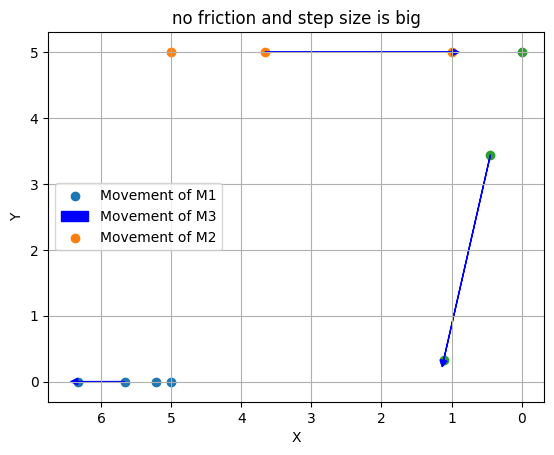

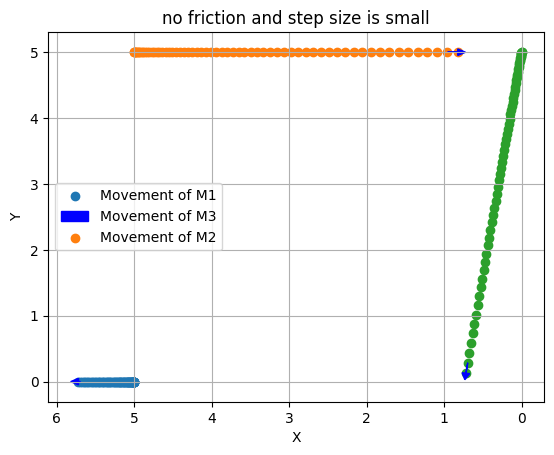

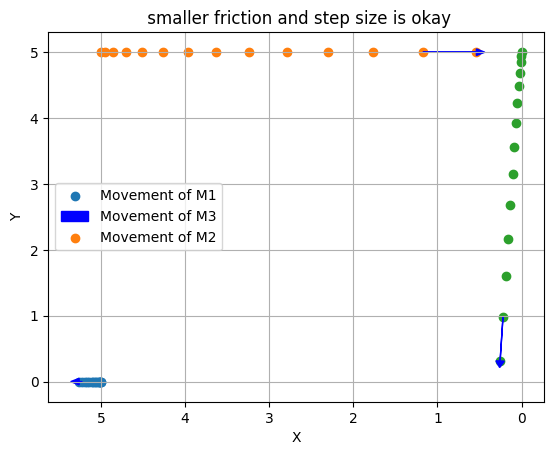

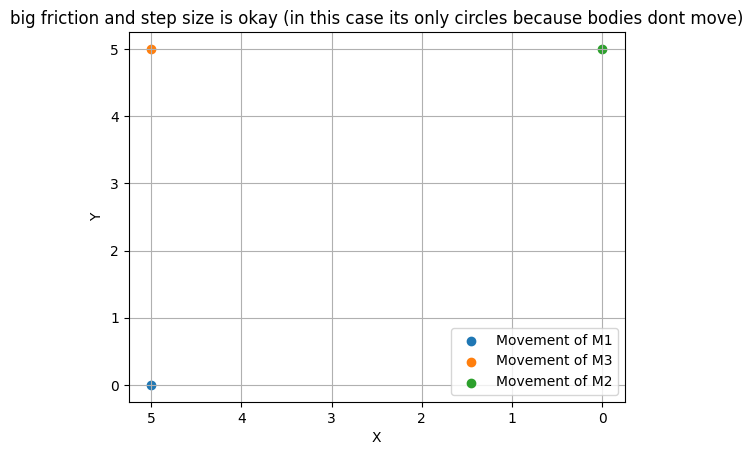

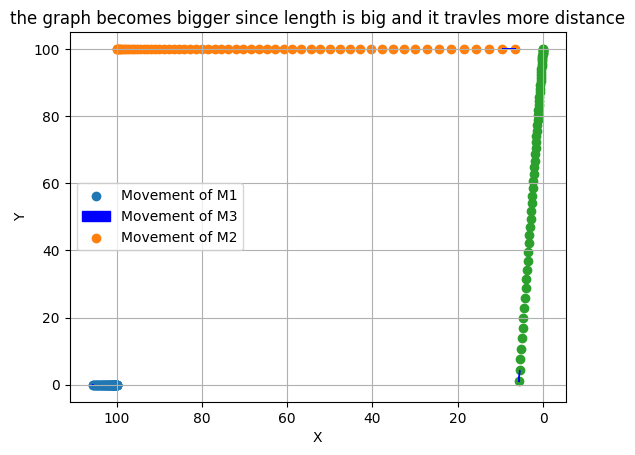

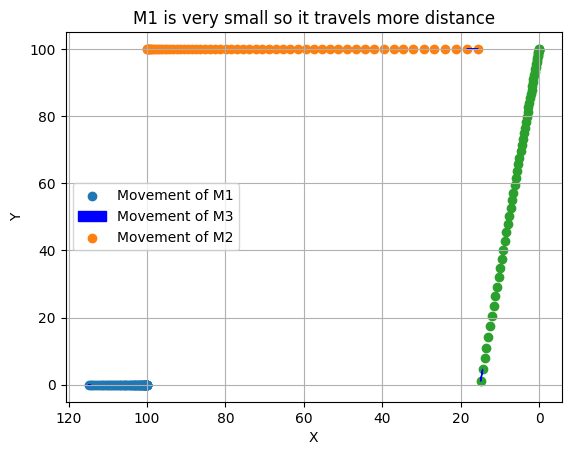

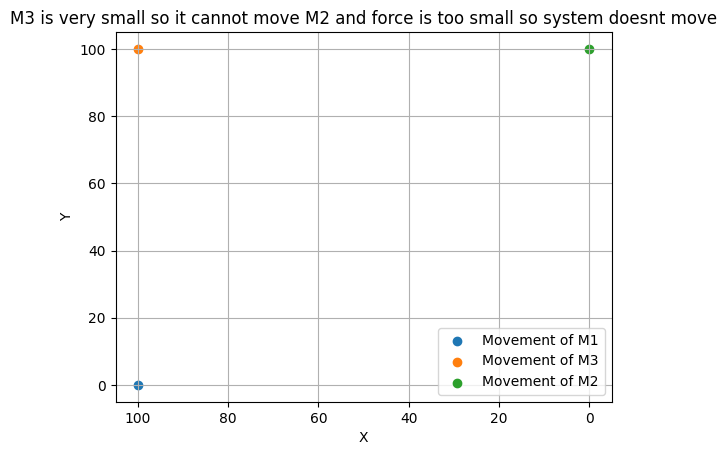

In [23]:
for c in some_cases:
  visualize(simulate(*c[0]),c[1])